In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
X1_positive = []
X2_positive = []
X1_negative = []
X2_negative = []

for i in range(3):
    X1_positive.append(random.uniform(0,1))
    X2_positive.append(random.uniform(0,1))
    X1_negative.append(random.uniform(-1,0))
    X2_negative.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
data = data1 + data2

In [13]:
a = random.uniform(-1,1)

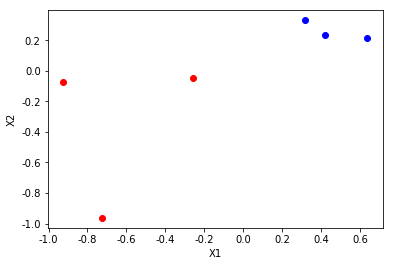

In [14]:
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [15]:
def getRandomSeparator(data):
    X2 = np.array(data)[:,1:2]
    y = np.array(data)[:,2:3]
    flag = True
    while flag:
        a_random = random.uniform(-1,1)
        count = 0
        for i in range(len(X2)):
            if np.sign(X2[i]-a_random)*y[i] == 1:
                count += 1
        if count == 6:
            flag = False
    return a_random

In [16]:
a_random = getRandomSeparator(data)
print(a_random)

0.1938080121883583


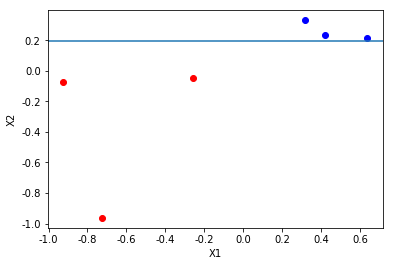

In [17]:
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.axhline(a_random)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [18]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(np.array(data)[:,0:2],np.array(data)[:,2])
print(clf.coef_[0])
W = clf.coef_[0]
b = clf.intercept_[0]
print("W0 = ", W[0])
print("W1 = ", W[1])
print("b = ", b)

[1.36002363 0.5581531 ]
W0 =  1.3600236263437742
W1 =  0.5581530955005657
b =  0.3023630575097477


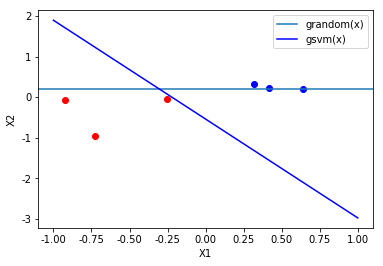

In [19]:
from collections import OrderedDict
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
X = np.array(data)[:,0:2]
plt.axhline(a_random, label='grandom(x)')
plt.plot(x, (-W[0]*x-b)/W[1], color='blue', linestyle='-',label='gsvm(x)' )
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [129]:
def RandomDataPointsGenerator():
    X1_positive = []
    X2_positive = []
    X1_negative = []
    X2_negative = []
    
    for i in range(3):
        X1_positive.append(random.uniform(0,1))
        X2_positive.append(random.uniform(0,1))
        X1_negative.append(random.uniform(-1,0))
        X2_negative.append(random.uniform(-1,0))

    #label the data
    data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
    data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
    data = data1 + data2
    return data

In [130]:
random_a_array = []
random_svm_a_array = []

for i in range(1,100001):
    data = RandomDataPointsGenerator()    
    random_a_array.append(random.uniform(-1,1))
    clf.fit(np.array(data)[:,0:2],np.array(data)[:,2])
    W = clf.coef_[0]
    b = clf.intercept_[0]
    perceptron.fit(data)
    random_a_array.append(-perceptron.W[0])
    random_svm_a_array.append(-b)

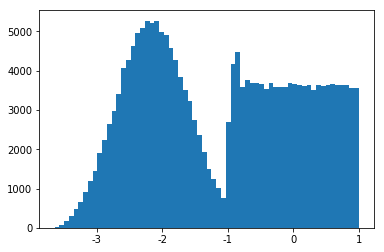

In [131]:
plt.hist(random_a_array, bins='auto')
plt.show()

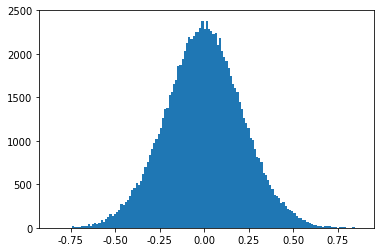

In [132]:
plt.hist(random_svm_a_array, bins='auto')
plt.show()

In [133]:
#Comparing the histogram we get gaussian distribution for asvm while for arandom we get uneven distribution.